In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import struckpod.walks as wks
import scipy as sp
import scipy.linalg as lin

# Construct 13-node snow-flake graph:
#   A 12-cycle with a single node connected to every other vertex
flake_number = 5
Cn = nx.cycle_graph(2*flake_number)
Adj = nx.adjacency_matrix(Cn).toarray()
A_snowflake = np.zeros((1+2*flake_number,1+2*flake_number))
A_snowflake[1:(1+2*flake_number), 1:(1+2*flake_number)] = Adj

# Construct vector to identify "every other node" in the cycle
temp_vec = np.zeros((2*flake_number,1))
a_mod = 0
for j in range(len(temp_vec)):
    if j%2==(a_mod%2):
        temp_vec[j] = 1

A_snowflake[1:(1+2*flake_number),0] = np.squeeze(temp_vec)
A_snowflake[0,1:(1+2*flake_number)] = np.squeeze(temp_vec.T)

# Draw snow-flake graph
'''G=nx.from_numpy_matrix(A_snowflake)
nx.draw_spectral(G)
plt.show()
'''


# Next link together 5 of these snowflakes
D = np.zeros( (1+2*flake_number) )
D[1:(1+2*flake_number)] = np.squeeze(temp_vec)
D = np.diag(D)

inner_length = 5
cycle_inner_g = nx.cycle_graph(inner_length)
cycle_inner = nx.adjacency_matrix(cycle_inner_g).toarray()
I_inner = np.identity(inner_length)
A_inner = np.kron(I_inner, A_snowflake) + np.kron(cycle_inner,D)

# Now link together 3 copies of the 5 pentagons via triangles
outer_length = 3
cycle_outer_g = nx.cycle_graph(outer_length)
cycle_outer = nx.adjacency_matrix(cycle_outer_g).toarray()

temp_vec = np.zeros((2*flake_number,1))
for j in range(len(temp_vec)):
    if j%2==(a_mod+1%2):
        temp_vec[j] = 1
temp_vec = np.squeeze(temp_vec)
D = np.zeros(1+2*flake_number)
D[1:(1+2*flake_number)] = temp_vec

I_outer = np.identity(outer_length)
AG = np.kron(I_outer, A_inner) + np.kron(cycle_outer, np.kron( I_inner, np.diag(D)) )
AG = np.asmatrix(AG)


In [ ]:
# Incorporate this code in the nonneagtive / positive linear system sovlers in walks.py

        # Default parameter values
        A_eq = np.bmat( [w, np.asmatrix(np.zeros(num_rows)).T] )
        c = np.ones(num_cols+1)
        c[-1] = -1
        A_ub = np.bmat([-np.matrix(np.identity(num_cols)), np.asmatrix(np.ones(num_cols))])
        b_ub = np.zeros(num_cols)
        b_eq = np.ones(num_rows)
        

In [5]:
num_nodes = np.shape(AG)[0]
inds = [0,1,2]
#inds = [range(num_nodes)]
Ut = np.zeros((len(inds),4))

A_temp = AG**2
diag = np.diag(A_temp)
Ut[:,0] = np.squeeze(diag[inds])

A_temp = AG**3
diag = np.diag(A_temp)
Ut[:,1] = np.squeeze(diag[inds])

A_temp = AG**5
diag = np.diag(A_temp)
Ut[:,2] = np.squeeze(diag[inds])

A_temp = AG**4
diag = np.diag(A_temp)
Ut[:,3] = np.squeeze(diag[inds])



Ut = np.matrix(Ut)
print(Ut)

[[  5.   0.   0.  55.]
 [  5.   0.   6.  47.]
 [  4.   2.  26.  32.]]


In [8]:
python3 -m code.scripts.prove_deceptive_snowflakecycle

NameError: name 'scripts' is not defined

In [4]:
# Parameter values
num_rows, num_cols = Ut.shape

A_eq = np.zeros( (num_rows, num_cols+2) )
A_eq[:,0:num_cols] = Ut
A_eq[:,num_cols] = -np.squeeze(np.ones(shape=(num_rows,1)))
A_eq[:,-1] = -np.squeeze(np.zeros(shape=(num_rows,1)))
A_eq = np.matrix(A_eq)
print(A_eq)
print('A_eq')

num_rows,num_cols = np.shape(A_eq)
c = np.ones(num_cols)
print(c)
print('c')

A_ub = np.zeros( (num_rows+1, num_cols) )
A_ub[:,0:num_rows+1] = -np.identity(num_rows+1)
A_ub[0:num_rows,-1] = np.squeeze(np.ones(shape=(num_rows,1)))
A_ub = np.matrix(A_ub)
print(A_ub)
print('A_ub')

d = np.diag(lin.expm(AG))
print(d[0:3])

[[  5.   0.   0.]
 [  5.   0.   6.]
 [  4.   2.  26.]]
[[  5.   0.   0.  -1.  -0.]
 [  5.   0.   6.  -1.  -0.]
 [  4.   2.  26.  -1.  -0.]]
A_eq
[ 1.  1.  1.  1.  1.]
c
[[-1. -0. -0. -0. -1.]
 [-0. -1. -0. -0. -1.]
 [-0. -0. -1. -0. -1.]
 [-0. -0. -0. -1.  0.]]
A_ub
[ 7.17799615  6.60429866  5.58430618]


In [36]:
print(A_ub)
A_eq = np.bmat([Ut, np.asmatrix(np.zeros(num_rows)).T])
print(A_eq)

[[-1. -0. -0. -0. -1.]
 [-0. -1. -0. -0. -1.]
 [-0. -0. -1. -0. -1.]
 [-0. -0. -0. -1.  0.]]
[[  5.   0.   0.   0.]
 [  5.   0.   6.   0.]
 [  4.   2.  26.   0.]]


In [31]:
help(np.bmat)

Help on function bmat in module numpy.matrixlib.defmatrix:

bmat(obj, ldict=None, gdict=None)
    Build a matrix object from a string, nested sequence, or array.
    
    Parameters
    ----------
    obj : str or array_like
        Input data.  Names of variables in the current scope may be
        referenced, even if `obj` is a string.
    ldict : dict, optional
        A dictionary that replaces local operands in current frame.
        Ignored if `obj` is not a string or `gdict` is `None`.
    gdict : dict, optional
        A dictionary that replaces global operands in current frame.
        Ignored if `obj` is not a string.
    
    Returns
    -------
    out : matrix
        Returns a matrix object, which is a specialized 2-D array.
    
    See Also
    --------
    matrix
    
    Examples
    --------
    >>> A = np.mat('1 1; 1 1')
    >>> B = np.mat('2 2; 2 2')
    >>> C = np.mat('3 4; 5 6')
    >>> D = np.mat('7 8; 9 0')
    
    All the following expressions construct the s

In [260]:
g = [d[idx] for idx in inds]
b_eq = -np.asarray(g)
print(b_eq)
print('b_eq')

b_ub = np.zeros(num_rows+1)
b_ub[-1] = -max(abs(b_eq))
print(b_ub)
print('b_ub')

# Return result
opt_obj = sp.optimize.linprog(
    c=c,
    A_ub=A_ub,
    b_ub=b_ub,
    A_eq=A_eq,
    b_eq=b_eq
)
opt_obj

[-7.17799615 -6.60429866 -5.58430618]
b_eq
[ 0.          0.          0.         -7.17799615]
b_ub


     fun: 12.627607173976106
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 0.89233246,  0.        ,  0.09561625,  4.46166232])
  status: 0
 success: True
       x: array([  0.89233246,   0.        ,   0.09561625,  11.63965846,   0.        ])

In [230]:
opt_obj
Ut[2,2] = 5

In [96]:
Wobj

{'classes': {0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  8: [8],
  9: [9],
  10: [10],
  11: [11],
  12: [12],
  13: [13],
  14: [14],
  15: [15],
  16: [16],
  17: [17],
  18: [18],
  19: [19],
  20: [20],
  21: [21],
  22: [22],
  23: [23],
  24: [24],
  25: [25],
  26: [26],
  27: [27],
  28: [28],
  29: [29],
  30: [30],
  31: [31],
  32: [32],
  33: [33],
  34: [34],
  35: [35],
  36: [36],
  37: [37],
  38: [38],
  39: [39],
  40: [40],
  41: [41],
  42: [42],
  43: [43],
  44: [44],
  45: [45],
  46: [46],
  47: [47],
  48: [48],
  49: [49],
  50: [50],
  51: [51],
  52: [52],
  53: [53],
  54: [54],
  55: [55],
  56: [56],
  57: [57],
  58: [58],
  59: [59],
  60: [60],
  61: [61],
  62: [62],
  63: [63],
  64: [64],
  65: [65],
  66: [66],
  67: [67],
  68: [68],
  69: [69],
  70: [70],
  71: [71],
  72: [72],
  73: [73],
  74: [74],
  75: [75],
  76: [76],
  77: [77],
  78: [78],
  79: [79],
  80: [80],
  81: [81],
  82: [82],
  83: [83],
 

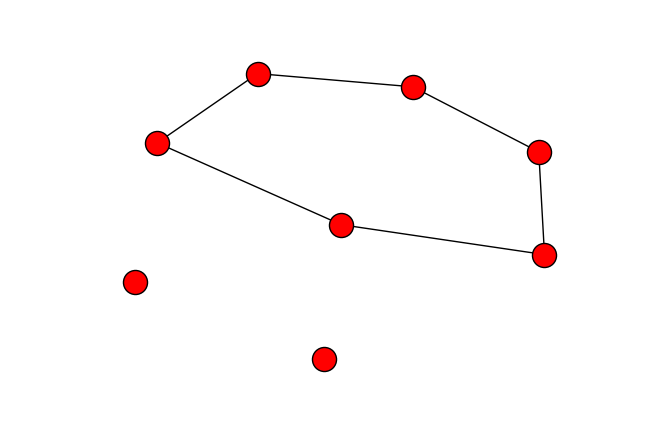

In [27]:
G = nx.Graph()

G.add_nodes_from(range(0,8))

G.add_edges_from( [(a, (a+1) % 6) for a in range(0,6)] )

nx.draw(G)
plt.show()

In [31]:
G.add_edges_from( [(6, 0), (6, 2), (6, 4)] )
G.add_edges_from( [(7, 1), (7, 3), (7, 5)] )

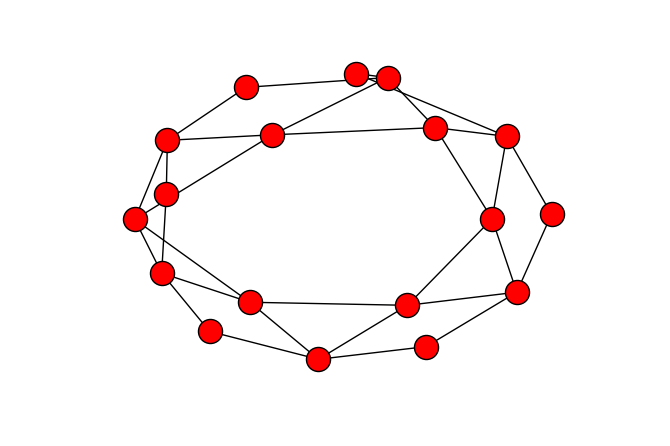

In [117]:
import common.generators as gen
G = gen.snowflake()

nx.draw(G)
plt.show()